# Instructors Bootcamp

## Congratulations!

If you're viewing this on your own computer, then you've found your way into the UNG Datahub.  

The first thing we're going to do is take you on a little tour of the hub itself.  We know you're computer savvy people, you can click on things that have labels like File, Open, Download As, Insert, Cell, and so on, and then figure out what they do on your own, but to hurry things along, we'll show you some of the features that we've found most useful. Mainly, we'll try to answer these particular questions.  

+ Opps, I clicked the wrong link, can I open the right file faster from here?  

    + Yes!
    
+ Can I see what parent director I'm in?  And what .csv files are available for classroom examples?  

    + Yes, and Yes.

+ Can I open a blank notebook from here?

    + Yes.
    
+ Can I download my work as HTML or pdf?
    + Yes, we'll show you how.

+ This is my personal hub.  Can anyone else see it?  

    + If you're an instructor, except for our IT guy, Lance, No, probably not.

+ If I'm an instructor, can I invade one of my student's personal hub? 

    + Yes, Dr. Sinn will explain how.  

+ Some of the cells below look different from each other.  How do I tell if a cell is a Python code cell or a Markdown cell?  And how do I switch between them?  

    + Yeah, we'll explain that by way of example as we go through the rest of this notebook.  

+ Can I use simple LaTeX in a Markdown cell?  Can I use some basic HTML?  Can I create tables?

    + Let me answer that the geekiest way possible.
    
|Thing                                      | Can I do it?|    
|-------------------------------------------|-------|
|LaTeX                                      |$Y^{e^s}$  |
|<span style="color:#AA22FF"> HTML </span>  |<span style="color:red"> <i>Yes</i> </span>  |
|Tables                                     | <b>Clearly, yes</b>   |

If you want to know how, double click on this cell to open it as an editable Markdown cell and look at the code. 

## Getting started with Python code

In the cell below, we place some code.

+ This code will appear at the top or near the top of nearly every homework, lab and lecture notebook you and your students open. 

+ There is very little need to know what this code does.

+ BUT, what this code does is import modules that we will constantly use, and setup the formatting for graphs we make.  

+ If creating a new file starting with a blank notebook, remember CUT-N-PASTE.

In [1]:
# Stuff that will appear at the top of notebooks;
# You don't have to understand how this works or change it for now.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import scipy.stats as stats


def favstats(table, data):
    ### This function will find all the major descriptive stats you need ###
    ### Copy this function, past it in new notebooks and use it          ###
    cut = table.column(data)
    favstats = Table().with_column('mean', np.average(cut))
    favstats = favstats.with_column('std', stats.tstd(cut))
    favstats = favstats.with_column('min', min(cut))
    favstats = favstats.with_column('Q1', np.percentile(cut, 25))
    favstats = favstats.with_column('median', np.median(cut))
    favstats = favstats.with_column('Q3', np.percentile(cut, 75))
    favstats = favstats.with_column('max', max(cut))
    favstats = favstats.with_column('IQR', stats.iqr(cut))
    favstats = favstats.with_column('n', len(cut))
    return favstats


## Running cells

To run a cell of Python code, you can do several different things.  Here's my three favorite options (there are others I'm not mentioning).  First, place your cursor in the cell you want to run, then either:


+ Hit `CTRL` + `Enter` (at the same time) on the keyboard,

+ Use the mouse to click the button at the top of the screen that looks ▶ Run, or

+ Hit `Shift` + `Enter` (at the same time) on the keyboard


If you haven't already, go to the cell above this one and run it, please, otherwise none of what we do below will work. 

## Creating data tables from .csv files

In [2]:
## This is the code that reads in a .csv file, but this isn't quite perfect

Table.read_table("baby.csv")

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
## The above cell shows us the data, but we can't use it yet

## Must give it a local name

baby = Table.read_table("baby.csv")

In [4]:
## The cell above doesn't produce any output because the last line didn't actually request any output
## to see the baby data, now ask for it by name here

baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


## Subsetting data tables

+ Choosing columns (.select or .drop)

+ Choosing rows (.where)

### First, columns (.select and .drop)

Suppose we don't care at all about the mothers age or weight.  To make a smaller data set without those variables, we can either SELECT the ones we want or DROP the ones we don't want, which ever is more efficient.  

In [5]:
baby2 = baby.drop("Maternal Age", "Maternal Pregancy Weight")

baby2

Birth Weight,Gestational Days,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,62,100,False
113,282,64,135,False
128,279,64,115,True
108,282,67,125,True
136,286,62,93,False
138,244,62,178,False
132,245,65,140,False
120,289,62,125,False
143,299,66,136,True
140,351,68,120,False


In [6]:
## Since we are keeping more than half the variables/columns in this table
## select is less efficient than drop, but here's an example of it anyway

baby2 = baby.select("Birth Weight", "Gestational Days", "Maternal Height", "Maternal Smoker")

baby2

Birth Weight,Gestational Days,Maternal Height,Maternal Smoker
120,284,62,False
113,282,64,False
128,279,64,True
108,282,67,True
136,286,62,False
138,244,62,False
132,245,65,False
120,289,62,False
143,299,66,True
140,351,68,False


In [7]:
## .select can also be used to reorder the columns

baby3 = baby.select("Maternal Smoker", "Birth Weight", "Maternal Height", "Gestational Days")

baby3

Maternal Smoker,Birth Weight,Maternal Height,Gestational Days
False,120,62,284
False,113,64,282
True,128,64,279
True,108,67,282
False,136,62,286
False,138,62,244
False,132,65,245
False,120,62,289
True,143,66,299
False,140,68,351


## Apply what we've learned so far!

There is a dataset in the parent directory (so you don't need to do anything technical to reach it) called skyscapers.csv
                                            
1. Use the Table.read_table function to read this dataset in and name it `sky`.

2. View the `sky` table.

3. Create a table called `sky2`, that contains all the columns and rows of `sky` EXCEPT the `name` column

### Now rows, .where

The .where method requires two things (at least), first the column/variable to choose rows based on and what are we looking for.  

The easiest use of the .where method is when we're looking for an exact match, like in the next two examples.

In [8]:
Smoking_Moms = baby.where("Maternal Smoker", True)

Smoking_Moms

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
128,279,28,64,115,True
108,282,23,67,125,True
143,299,30,66,136,True
144,282,32,64,124,True
141,279,23,63,128,True
110,281,36,61,99,True
92,255,25,65,125,True
115,261,33,60,125,True
119,288,43,66,142,True
115,274,27,67,175,True


In [9]:
Non_Smoking_Moms = baby.where("Maternal Smoker", False)

Non_Smoking_Moms

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
140,351,27,68,120,False
114,273,30,63,154,False
115,285,38,63,130,False
144,261,33,68,170,False


If you'll explore the lecture notebooks ahead of your students, you'll discover that there are many different ways to use the `.where` method to select rows from a table.  


What if I wanted just the babies born to adult aged mothers (18 years old or older, that is).

In [25]:
Adult_Moms = baby.where("Maternal Age", are.above_or_equal_to(18))

Adult_Moms

## Running this cell you'll notice that number of rows not shown changes from 1164 to 1156
## so 8 underaged mothers were omitted from this new data table.  

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


## Apply what we've learned

1. Start with the `sky` data table and make a new table by subsetting to only the skyscrapers where the material used to build it is steel.  Call this new data table, `steel`.  

2. Start with the `sky` data table and make a new table called `concrete` where all the skyscrapers in `concrete` are built using concrete.  

3. Make a table called `older_scrapers` by subsetting the `sky` table to include only the skyscrapers that were finished in 1963 or before.  

*Hint for 3: inside the* .where *use* are.below_or_equal_to

## This is cute.  Umm, how do I do STATISTICS in this?

First, one more little lesson.  

We have to pull data from our tables in the form of an array, which is nothing more than an list of numbers in a set order.    

The `.column` method will do that for us.  

In [10]:
Smoking_moms_baby_weight = Smoking_Moms.column("Birth Weight")

Smoking_moms_baby_weight

array([128, 108, 143, 144, 141, 110,  92, 115, 119, 115, 103, 114, 114,
       134, 122,  87, 143, 145, 108, 124, 122, 101, 128, 104, 137, 103,
       133,  91, 153,  99, 114, 125,  85,  87, 120, 107, 119,  91,  95,
       141, 100, 115,  94, 101, 112, 128,  93, 100, 105, 160, 113, 118,
       133, 116, 113, 131, 121, 122, 101, 113,  96, 142,  75, 104, 118,
        98, 150, 119, 101, 113,  97, 115, 121, 117, 110, 130, 140, 154,
       122, 144, 114, 154, 150,  99, 117, 130,  81, 124, 125, 115, 104,
       119, 123, 141, 129, 119, 109, 104, 110,  98, 136, 121,  91,  85,
       106, 109,  98, 101,  71, 124, 101, 100, 104, 117, 117, 117, 109,
       120, 103, 123, 104, 122, 116, 129, 133, 122, 133, 130, 106, 140,
       120, 127,  71, 129, 145, 102, 129, 135, 104, 126, 127,  98, 131,
        99, 115, 102, 143,  87, 130, 123, 116, 144, 120, 112, 132, 146,
       119, 100, 129, 122, 117, 144, 115,  99,  68, 102, 109, 102,  99,
       128, 101, 109, 117,  88,  95, 127, 107, 126,  98,  96,  9

In [11]:
Non_smoking_moms_baby_weight = Non_Smoking_Moms.column("Birth Weight")

In [12]:
## Finding the mean of an array of data

np.mean(Smoking_moms_baby_weight)

113.81917211328977

In [13]:
## Finding the standard deviation of an array of numbers

stats.tstd(Smoking_moms_baby_weight)

18.295010373139494

In [14]:
## One function to create a table with all the summary stats usually needed

favstats(Smoking_Moms, "Birth Weight")

mean,std,min,Q1,median,Q3,max,IQR,n
113.819,18.295,58,101,115,126,163,25,459


## Hypothesis tests?

Most hypothesis tests can be run in between 1 and 3 lines of code.  



In [15]:
## The following line of code runs a two-sample t-test

stats.ttest_ind(Smoking_moms_baby_weight, Non_smoking_moms_baby_weight)

Ttest_indResult(statistic=-8.718755502379533, pvalue=9.461067881089321e-18)

## Apply it!

Earlier, you created two data tables by subsetting the `sky` data table on skyscrapers.  One was called `steel` and the other `concrete`.  

1. Use the .column method to pull the height from the `steel` data table as an array and call it `steel_height`.

2. Use the .column method to pull the height from the `concrete` data table as an array and call it `concrete_height`.

3. Run a two-sample t-test to determine if there is a significant difference in the heights of these steel and concrete buildings.  


Are all the usual hypothesis tests this easy?  Yes, here's the code for them.  

In [16]:
## 1-sample t-test

# stats.ttest_1samp()



## matched pairs t-test

# stats.ttest_rel()



## Chi-squared test for independence

# stats.chi2_contingency()



## Linear regression and correlation

# stats.linregress()


## ANOVA

#stats.f_oneway()

## Wait, what about histograms, boxplots, scatterplots, etc?

Those are actually super easy to create directly from the tables.  

In the appropriate lecture notebooks covering those topics there are many examples of how to create those things.  But here are some examples, that we can discuss.  


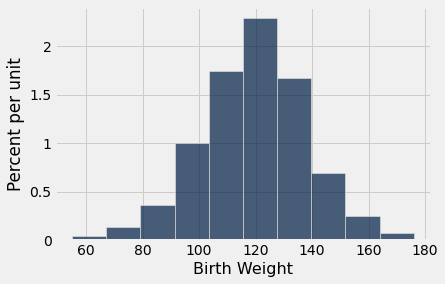

In [17]:
baby.hist("Birth Weight")

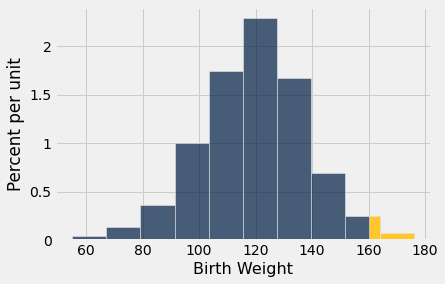

In [18]:
baby.hist("Birth Weight", left_end = 160)

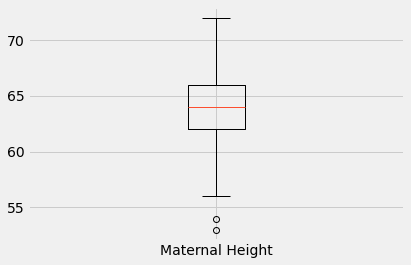

In [19]:
baby.select("Maternal Height").boxplot()

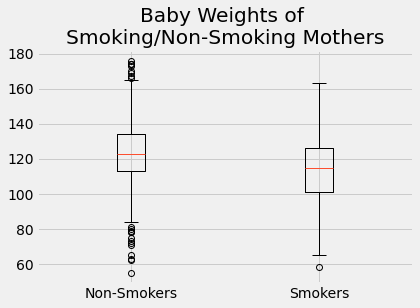

In [20]:
labels = make_array("Non-Smokers", "Smokers")  # Change to appropriate labels
my_title = "Birth Weights By Mothers Smoking Status"  # Change to your title
ticks=make_array(2.5, 3.5)  


plots.boxplot(Non_smoking_moms_baby_weight, positions = make_array( ticks.item(0)))
plots.boxplot(Smoking_moms_baby_weight, positions = make_array(ticks.item(1)))
plots.xticks(ticks, labels)
plots.title("Baby Weights of \nSmoking/Non-Smoking Mothers");

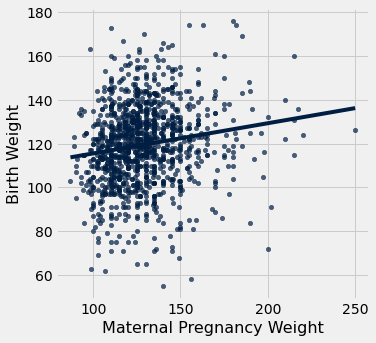

In [21]:
baby.scatter("Maternal Pregnancy Weight", "Birth Weight", fit_line= True)

## That can't be everything!

+ Your right, it's not.  But it's a start.

+ Be sure to go through the lecture notebooks *before* you go over them with your students.

+ You'll learn a lot more as you do this.

### What if I have more questions?

+ Ask Brad, Gregg or Robb.  

+ If you don't have time to find one of us, then try the `help` function in Python.  All you need to know is the name of the function and (if applicable) the name of the module it comes from.  

    + You can actually apply the help function to an entire module, but it returns a document that in some cases is like 90 pages long, because it contains documentation for every function in the module.  I've done this (when I was trying to teach myself the scipy module).  Viewing it through Juypyter was a nightmare, so I cut and pasted it into Microsoft Word, which gave me a document that was both searchable and overall easier to view, just FYI.  

+ In a real emergency, try Google.  

In [22]:
help(Table.boxplot)

Help on function boxplot in module datascience.tables:

boxplot(self, **vargs)
    Plots a boxplot for the table.
    
    Every column must be numerical.
    
    Kwargs:
        vargs: Additional arguments that get passed into `plt.boxplot`.
            See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot
            for additional arguments that can be passed into vargs. These include
            `vert` and `showmeans`.
    
    Returns:
        None
    
    Raises:
        ValueError: The Table contains columns with non-numerical values.
    
    >>> table = Table().with_columns(
    ...     'test1', make_array(92.5, 88, 72, 71, 99, 100, 95, 83, 94, 93),
    ...     'test2', make_array(89, 84, 74, 66, 92, 99, 88, 81, 95, 94))
    >>> table
    test1 | test2
    92.5  | 89
    88    | 84
    72    | 74
    71    | 66
    99    | 92
    100   | 99
    95    | 88
    83    | 81
    94    | 95
    93    | 94
    >>> table.boxplot() # doctest: +SKIP
    <boxplot of t

In [23]:
help(np.mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs,

In [24]:
help(stats.tstd)

Help on function tstd in module scipy.stats.stats:

tstd(a, limits=None, inclusive=(True, True), axis=0, ddof=1)
    Compute the trimmed sample standard deviation.
    
    This function finds the sample standard deviation of given values,
    ignoring values outside the given `limits`.
    
    Parameters
    ----------
    a : array_like
        array of values
    limits : None or (lower limit, upper limit), optional
        Values in the input array less than the lower limit or greater than the
        upper limit will be ignored. When limits is None, then all values are
        used. Either of the limit values in the tuple can also be None
        representing a half-open interval.  The default value is None.
    inclusive : (bool, bool), optional
        A tuple consisting of the (lower flag, upper flag).  These flags
        determine whether values exactly equal to the lower or upper limits
        are included.  The default value is (True, True).
    axis : int or None, option